<a href="https://colab.research.google.com/github/AnishaKumari07246/Intrusion-Detection-and-Prevention-System-IDPS--ML-Python/blob/main/kdd2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/UNSW_NB15_training-set.csv')

In [ ]:
test = pd.read_csv('/content/UNSW_NB15_testing-set.csv')

In [ ]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,Normal,0.0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24800 entries, 0 to 24799
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 24800 non-null  int64  
 1   dur                24800 non-null  float64
 2   proto              24800 non-null  object 
 3   service            24800 non-null  object 
 4   state              24800 non-null  object 
 5   spkts              24800 non-null  int64  
 6   dpkts              24800 non-null  int64  
 7   sbytes             24800 non-null  int64  
 8   dbytes             24800 non-null  int64  
 9   rate               24800 non-null  float64
 10  sttl               24800 non-null  int64  
 11  dttl               24800 non-null  int64  
 12  sload              24800 non-null  float64
 13  dload              24799 non-null  float64
 14  sloss              24799 non-null  float64
 15  dloss              24799 non-null  float64
 16  sinpkt             247

In [ ]:
train.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,24800.000000,24800.000000,24800.000000,24800.000000,2.480000e+04,2.480000e+04,2.480000e+04,24800.000000,24800.000000,2.480000e+04,...,24799.000000,24799.000000,24799.000000,24799.000000,24799.000000,24799.000000,24799.000000,24799.000000,24799.000000,24799.000000
mean,12400.500000,0.914838,14.788427,12.031129,9.022549e+03,1.007340e+04,1.420156e+05,219.370403,61.416048,8.634913e+07,...,11.336102,8.583290,16.538852,0.011049,0.011049,0.113472,12.753256,16.799226,0.000484,0.932175
std,7159.287674,5.155169,163.772450,143.628485,2.129230e+05,1.885519e+05,1.698636e+05,76.574960,106.253854,1.354146e+08,...,12.848283,8.836106,16.182066,0.106065,0.106065,0.539537,12.473256,15.853419,0.021993,0.251451
min,1.000000,0.000000,1.000000,0.000000,4.600000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,6200.750000,0.000005,2.000000,0.000000,1.140000e+02,0.000000e+00,8.400328e+01,254.000000,0.000000,6.890982e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000
50%,12400.500000,0.000009,2.000000,0.000000,1.680000e+02,0.000000e+00,1.111111e+05,254.000000,0.000000,5.700000e+07,...,3.000000,3.000000,7.000000,0.000000,0.000000,0.000000,9.000000,9.000000,0.000000,1.000000
75%,18600.250000,0.254943,10.000000,6.000000,7.160000e+02,2.680000e+02,2.000000e+05,254.000000,29.000000,1.000000e+08,...,19.000000,18.000000,31.000000,0.000000,0.000000,0.000000,20.000000,31.000000,0.000000,1.000000
max,24800.000000,59.997478,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,252.000000,3.428000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
train.describe(include=object)

,proto,service,state,attack_cat
count,24800,24800,24800,24799
unique,131,13,6,10
top,udp,dns,INT,Generic
freq,12702,11370,17236,11349


In [ ]:
train.shape

(24800, 45)

In [ ]:
train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                1
sloss                1
dloss                1
sinpkt               1
dinpkt               1
sjit                 1
djit                 1
swin                 1
stcpb                1
dtcpb                1
dwin                 1
tcprtt               1
synack               1
ackdat               1
smean                1
dmean                1
trans_depth          1
response_body_len    1
ct_srv_src           1
ct_state_ttl         1
ct_dst_ltm           1
ct_src_dport_ltm     1
ct_dst_sport_ltm     1
ct_dst_src_ltm       1
is_ftp_login         1
ct_ftp_cmd           1
ct_flw_http_mthd     1
ct_src_ltm           1
ct_srv_dst           1
is_sm_ips_ports      1
attack_cat 

In [ ]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

dload: 1 (0.004%)
sloss: 1 (0.004%)
dloss: 1 (0.004%)
sinpkt: 1 (0.004%)
dinpkt: 1 (0.004%)
sjit: 1 (0.004%)
djit: 1 (0.004%)
swin: 1 (0.004%)
stcpb: 1 (0.004%)
dtcpb: 1 (0.004%)
dwin: 1 (0.004%)
tcprtt: 1 (0.004%)
synack: 1 (0.004%)
ackdat: 1 (0.004%)
smean: 1 (0.004%)
dmean: 1 (0.004%)
trans_depth: 1 (0.004%)
response_body_len: 1 (0.004%)
ct_srv_src: 1 (0.004%)
ct_state_ttl: 1 (0.004%)
ct_dst_ltm: 1 (0.004%)
ct_src_dport_ltm: 1 (0.004%)
ct_dst_sport_ltm: 1 (0.004%)
ct_dst_src_ltm: 1 (0.004%)
is_ftp_login: 1 (0.004%)
ct_ftp_cmd: 1 (0.004%)
ct_flw_http_mthd: 1 (0.004%)
ct_src_ltm: 1 (0.004%)
ct_srv_dst: 1 (0.004%)
is_sm_ips_ports: 1 (0.004%)
attack_cat: 1 (0.004%)
label: 1 (0.004%)


In [ ]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


<ipython-input-15-05e1495f3e35>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train['label'], palette ='CMRmap')


<Axes: xlabel='label', ylabel='count'>

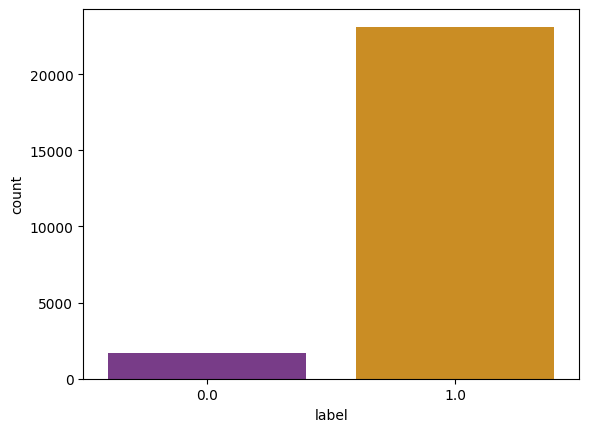

In [ ]:
sns.countplot(x=train['label'], palette ='CMRmap')

In [ ]:
print('Class distribution Training set:')
print(train['label'].value_counts())


Class distribution Training set:
label
1.0    23117
0.0     1682
Name: count, dtype: int64


<Axes: xlabel='proto', ylabel='count'>

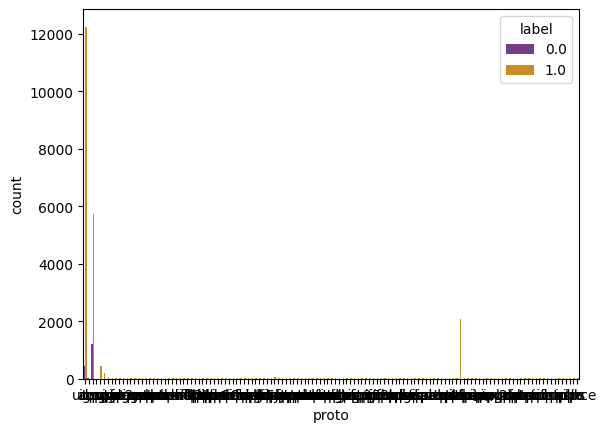

In [ ]:
sns.countplot(x='proto',hue='label' , data = train , palette ='CMRmap')

<ipython-input-18-9df75f8c8873>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(palette='mako', y='service' , data=train, order = train['service'].value_counts().index)


<Axes: xlabel='count', ylabel='service'>

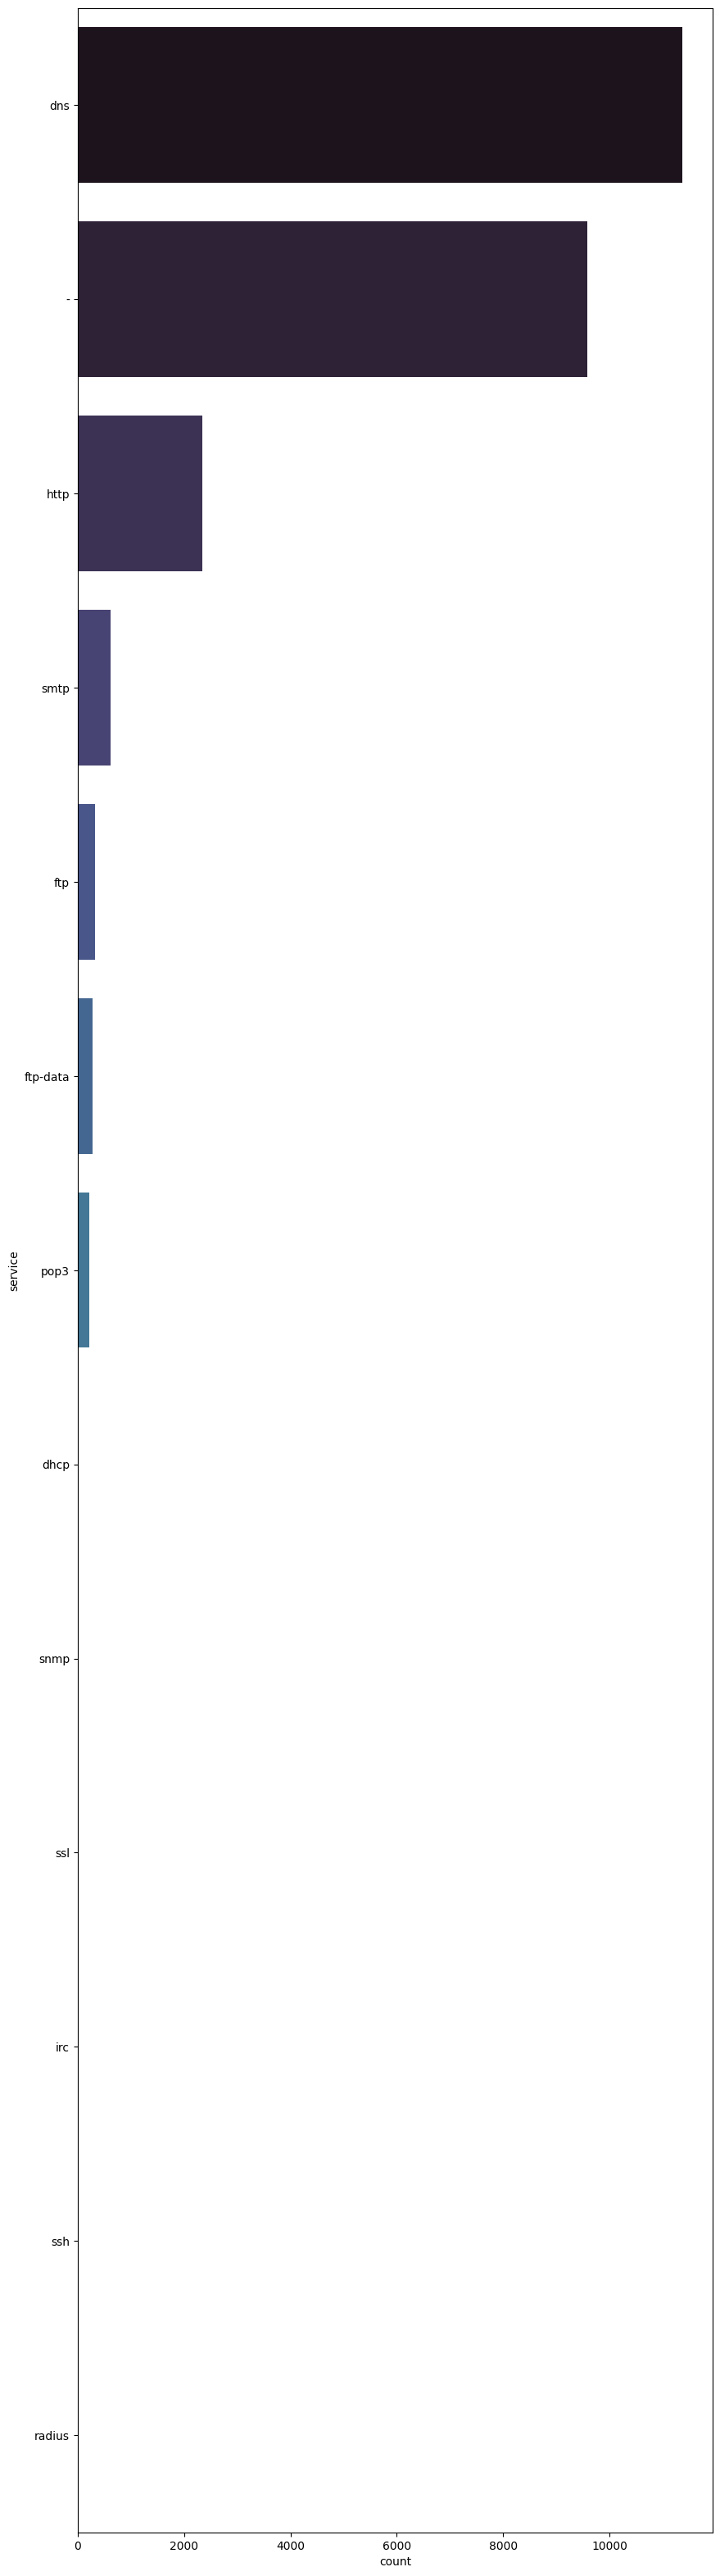

In [ ]:
plt.figure(figsize=(10,40))
sns.countplot(palette='mako', y='service' , data=train, order = train['service'].value_counts().index)

<Axes: xlabel='attack_cat', ylabel='count'>

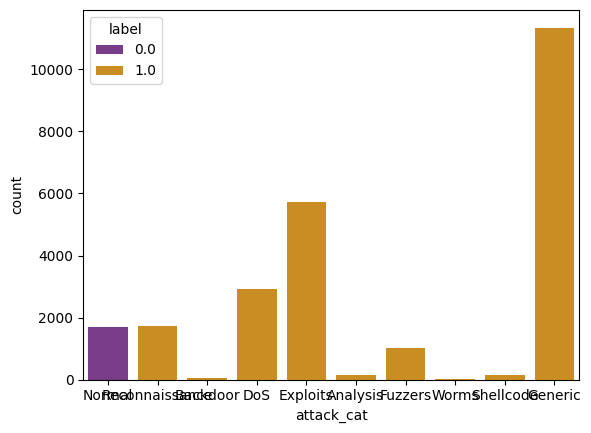

In [ ]:
sns.countplot(x='attack_cat',hue='label' , data = train , palette ='CMRmap')

<Axes: >

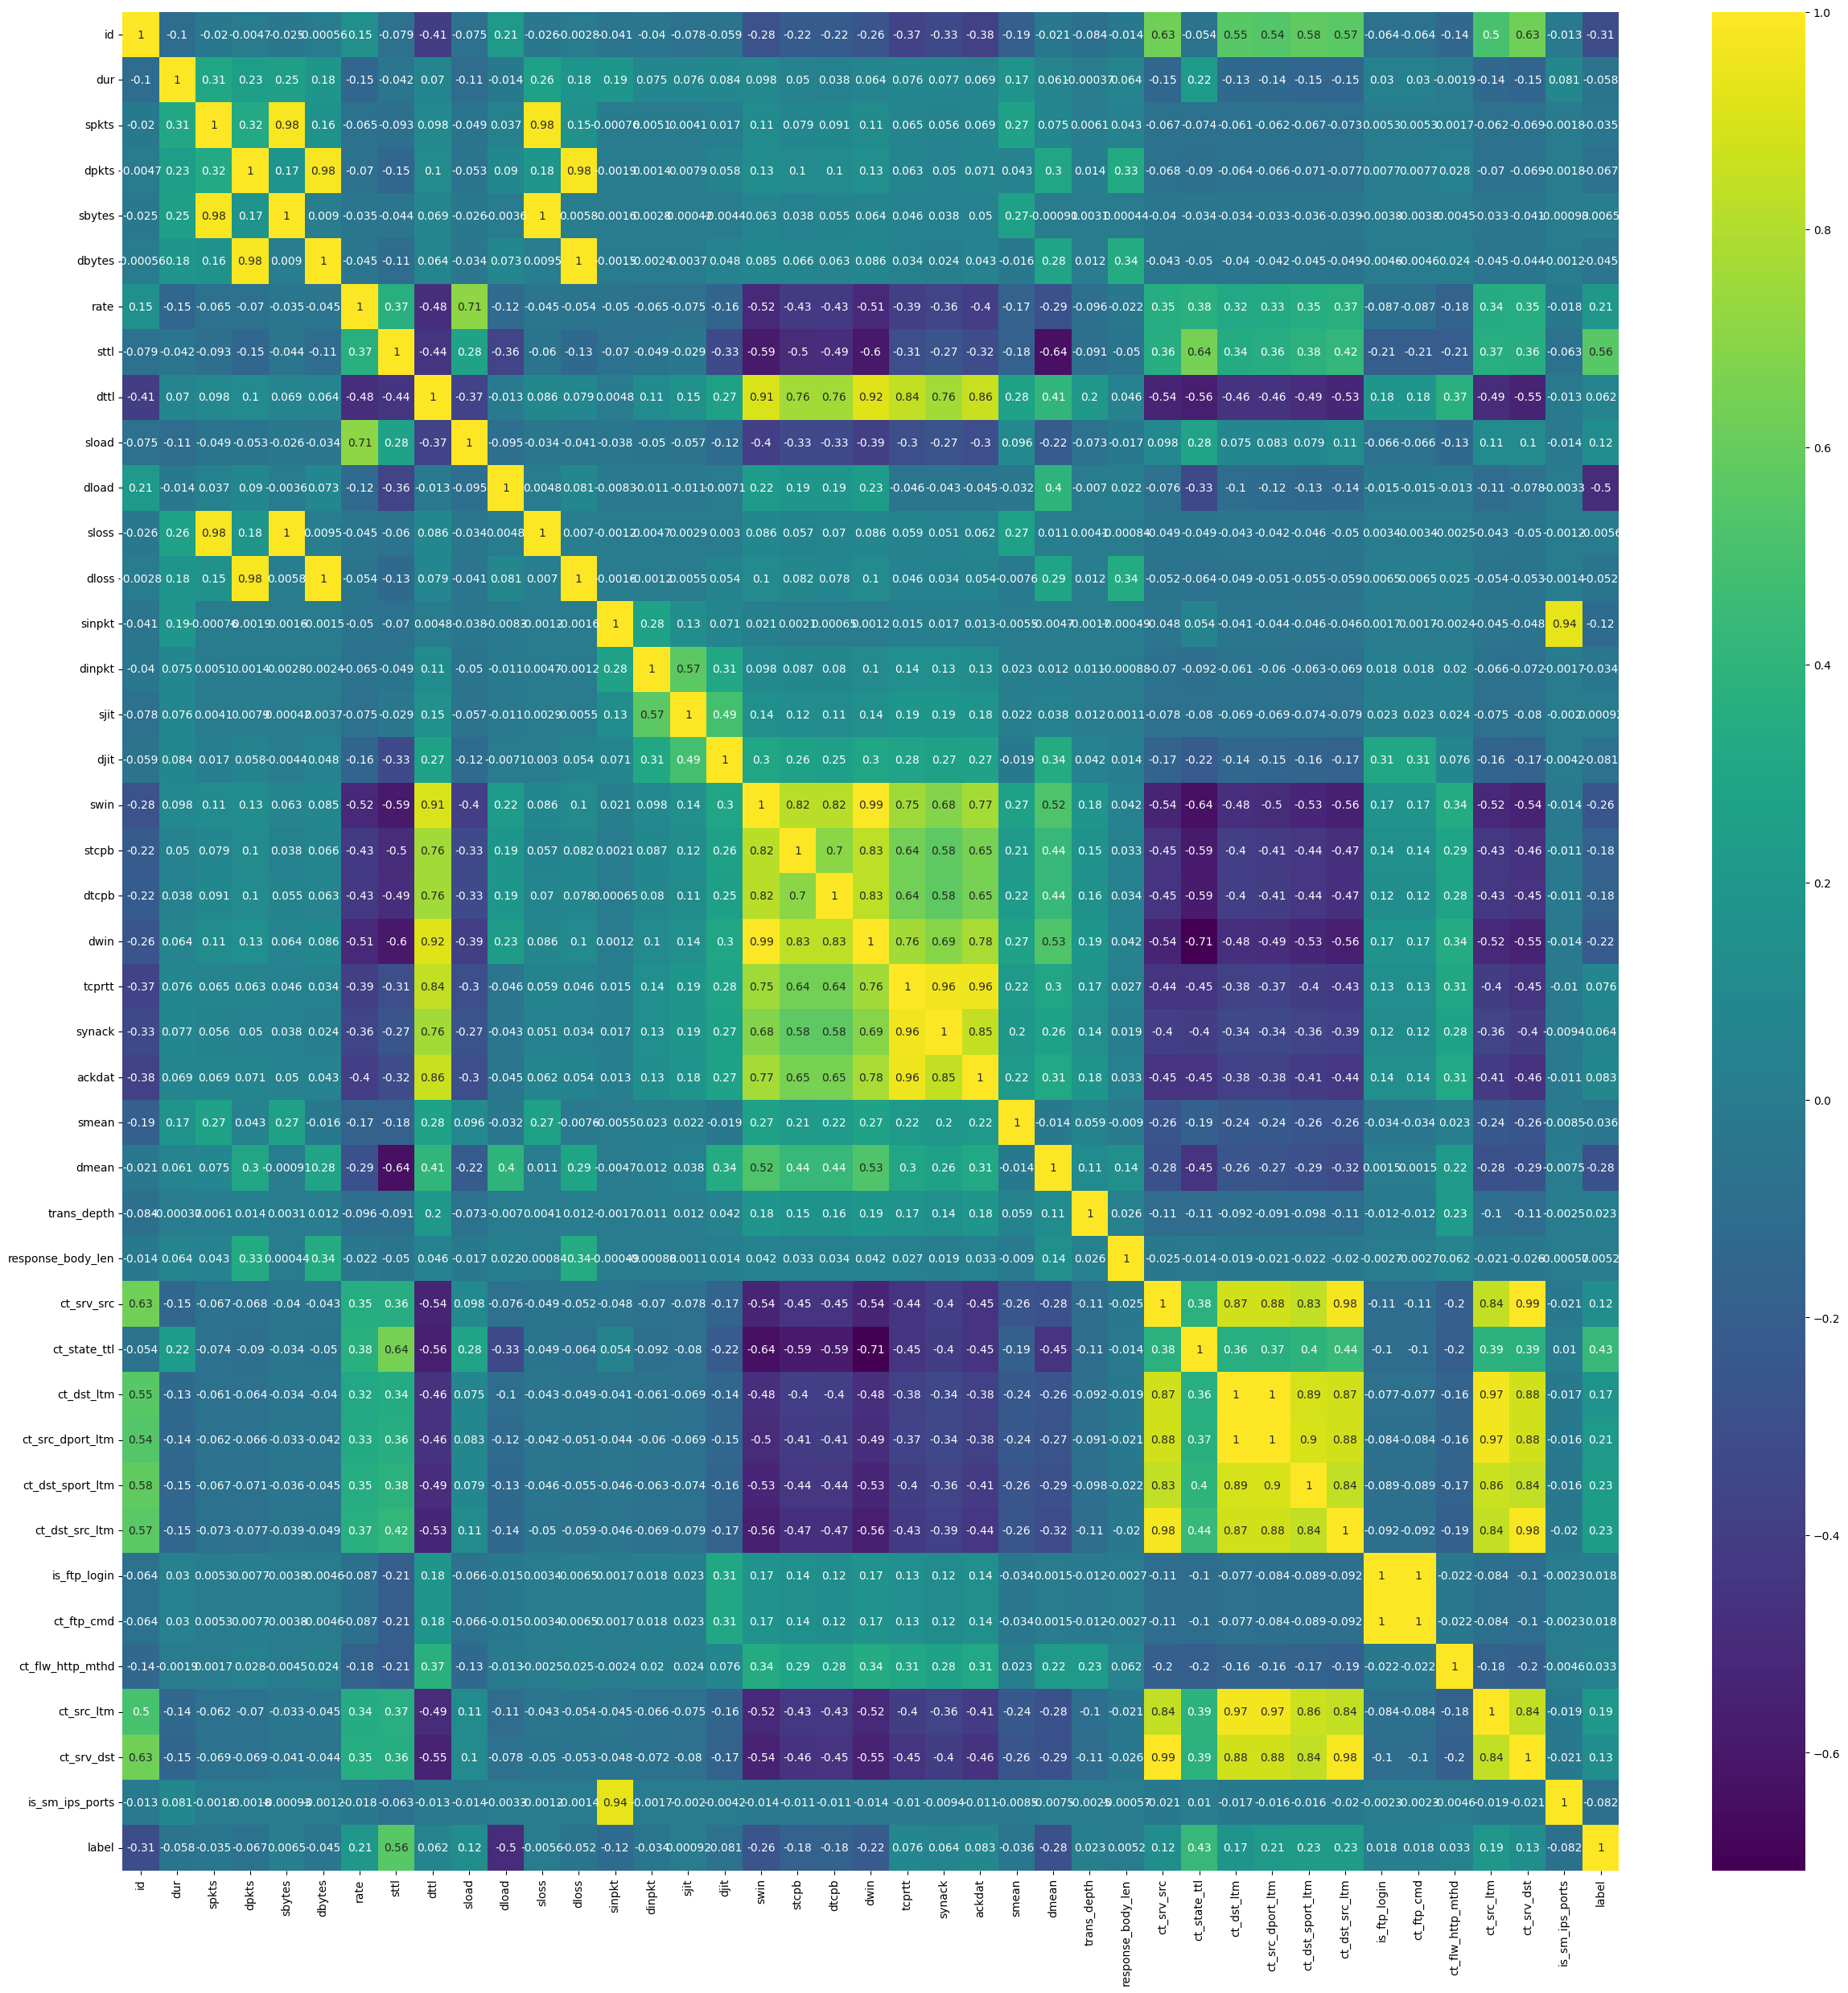

In [ ]:
numerical_train = train.select_dtypes(include=['number'])

plt.figure(figsize=(30,30))
sns.heatmap(numerical_train.corr(), annot= True,cmap='viridis')

In [ ]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [ ]:
# Check if 'num_outbound_cmds' exists in the DataFrames before dropping
if 'num_outbound_cmds' in train.columns:
    train.drop(['num_outbound_cmds'], axis=1, inplace=True)
else:
    print("'num_outbound_cmds' not found in training DataFrame")

if 'num_outbound_cmds' in test.columns:
    test.drop(['num_outbound_cmds'], axis=1, inplace=True)
else:
    print("'num_outbound_cmds' not found in testing DataFrame")

# Print the remaining columns to verify
print("Remaining columns in train:", train.columns)
print("Remaining columns in test:", test.columns)

'num_outbound_cmds' not found in training DataFrame
'num_outbound_cmds' not found in testing DataFrame
Remaining columns in train: Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')
Remaining columns in test: Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt',

In [ ]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,0,3,2,0,496,0,90909.0902,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,6,0.0
1,2,0.000008,117,0,3,2,0,1762,0,125000.0003,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,6,0.0
2,3,0.000005,117,0,3,2,0,1068,0,200000.0051,...,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,6,0.0
3,4,0.000006,117,0,3,2,0,900,0,166666.6608,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,6,0.0
4,5,0.000010,117,0,3,2,0,2126,0,100000.0025,...,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,6,0.0


In [ ]:
X_train = train.drop(['label'], axis=1)
Y_train = train['label']


In [ ]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

ValueError: Input X contains NaN.
RFE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values